In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import psth 

# Load data

In [4]:
import scipy.io
path_to_data = '/Volumes/JUICE/lab projects/spykes_example_data/reaching_example.mat'
mat = scipy.io.loadmat(path_to_data)


In [29]:
area = [i[0] for i in mat['Spikes']['area'][0]]
PMd_loc = [i for i, x in enumerate(area) if x == "PMd"]
M1_loc = [i for i, x in enumerate(area) if x == "M1"]
PMd_neurons = [spks for i, spks in enumerate(mat['Spikes']['times'][0]) if i in PMd_loc]
M1_neurons = [spks for i, spks in enumerate(mat['Spikes']['times'][0]) if i in M1_loc]

# get features

In [61]:
features = dict()

features['endpointOfReach'] = mat['CenterOutTrial']['ReachPosition'][0][0]*180/np.pi
features['rewardTime'] = mat['CenterOutTrial']['RewardTime'][0][0]
features['reward'] = mat['CenterOutTrial']['Reward'][0][0]
features['targetOnTime'] = mat['CenterOutTrial']['TargetOnTime'][0][0]
features['goCueTime'] = mat['CenterOutTrial']['GoCueTime'][0][0]

# define conditions

In [63]:
conditions = dict()

conditions[0] = dict()
conditions[0]['endpointOfReach'] = [0., 90.]

conditions[1] = dict()
conditions[1]['endpointOfReach'] = [90., 180.]

conditions[2] = dict()
conditions[2]['endpointOfReach'] = [180., 270.]

conditions[3] = dict()
conditions[3]['endpointOfReach'] = [270., 360.]

condition_names = [str(conditions[i]['endpointOfReach']) for i in conditions]

# psth for PMd neuron

In [64]:
neuron_number = 91
spike_times = PMd_neurons[neuron_number-1]
neuron_PMd = psth.PSTH(spike_times, name = 'PMd %d' % neuron_number)

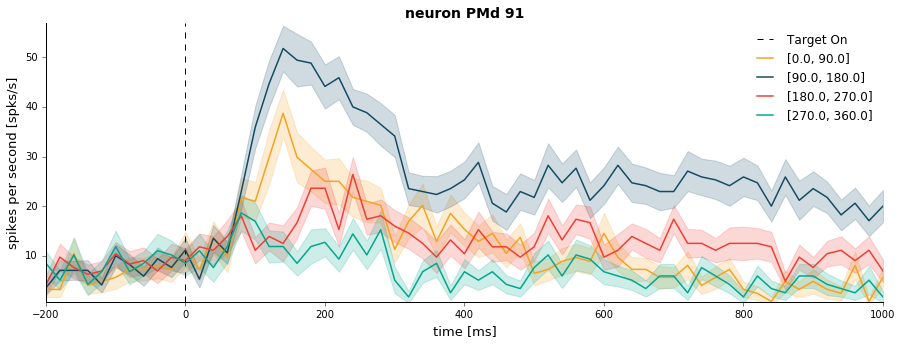

In [65]:
psth_PMd = neuron_PMd.get_psth(events = features['targetOnTime'],
                               features = features,
                               conditions = conditions,
                               window=[-200,1000],
                               binsize=20, 
                               plot=False);

neuron_PMd.plot_psth(psth = psth_PMd,
                     figsize=(15,5),
                     condition_names=condition_names,
                     event_name='Target On');

# psth for M1 neuron

In [66]:
neuron_number = 100
spike_times = M1_neurons[neuron_number-1]
neuron_M1 = psth.PSTH(spike_times, name = 'M1 %d' % neuron_number)

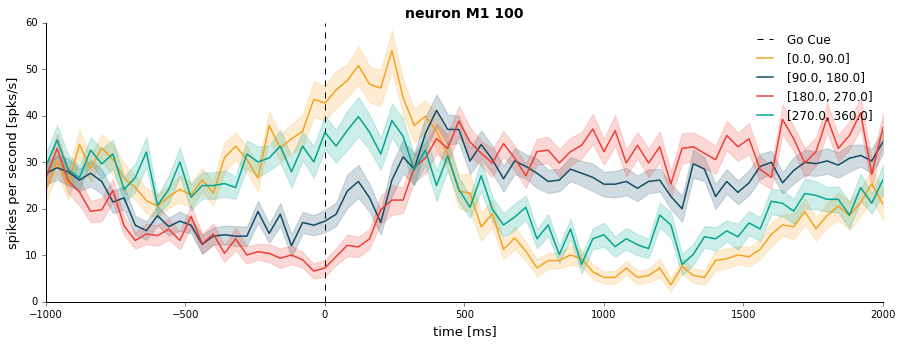

In [67]:
psth_M1 = neuron_M1.get_psth(events = features['goCueTime'],
                            features = features,
                            conditions = conditions,
                            window=[-1000,2000],
                            binsize=40,
                            plot=False);

neuron_M1.plot_psth(psth = psth_M1,
                     figsize=(15,5),
                     condition_names=condition_names,
                     event_name='Go Cue',
                     ylim = [0,60]);

# Let's look at reward vs no reward for this neuron

In [70]:
conditions_reward = dict()

conditions_reward[0] = dict()
conditions_reward[0]['reward'] = [34]

conditions_reward[1] = dict()
conditions_reward[1]['reward'] = [32]

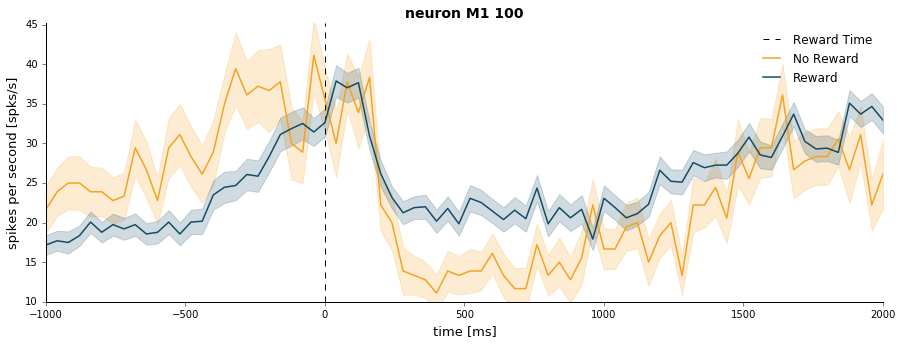

In [77]:
psth_M1 = neuron_M1.get_psth(events = features['rewardTime'],
                            features = features,
                            conditions = conditions_reward,
                            window=[-1000,2000],
                            binsize=40,
                            plot=False);

neuron_M1.plot_psth(psth = psth_M1,
                    figsize=(15,5),
                    event_name='Reward Time',
                    condition_names=['No Reward','Reward']);